In [84]:
!pip install kagglehub

In [27]:
!pip uninstall torch torchvision torchaudio

^C


In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.


In [86]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smaranjitghose/corn-or-maize-leaf-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\smaranjitghose\corn-or-maize-leaf-disease-dataset\versions\1


In [ ]:
!pip install vit-pytorch

  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached filelock-3.17.0-py3-none-any.whl (16 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached sympy-1.13.3-py3-none-any.whl (6.2 MB)
Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl (15 kB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lpips 0.1.4 requires scipy>=1.0.1, which is not installed.
visdom 0.2.4 requires jsonpatch, which is not installed.
visdom 0.2.4 requires scipy, which is not installed.
visdom 0.2.4 requires websocket-client, which is not installed.


In [24]:
import torch
print(torch.cuda.is_available())  # Harus mengembalikan True jika CUDA tersedia


True


In [25]:
# Zufar's code
import torch
from vit_pytorch import SimpleViT

v = SimpleViT(
    image_size = 256,
    patch_size = 32,
    num_classes = 4,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
)

img = torch.randn(1, 3, 256, 256)

preds = v(img) # (1, 1000)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(v.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

train_dir = 'D:\\PENELITIAN\\PENELITIAN - DIASH\\data_baru\\train_dataset'
trainset = datasets.ImageFolder(train_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=4)


<class 'torch.utils.data.dataloader.DataLoader'>


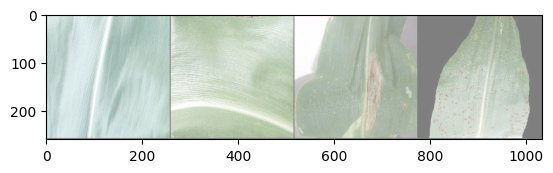

Healthy Healthy Blight Common_Rust


In [7]:

import matplotlib.pyplot as plt
import numpy as np
import torchvision
print(DataLoader)

data_iter = iter(trainloader)
images, labels = next(data_iter)

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
# print labels
classes = (['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'])
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
for i, data in tqdm(trainloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
    print(i)

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [27]:
v.to(device)

SimpleViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=32, p2=32)
    (1): LayerNorm((3072,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=3072, out_features=1024, bias=True)
    (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (transformer): Transformer(
    (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (to_qkv): Linear(in_features=1024, out_features=3072, bias=False)
          (to_out): Linear(in_features=1024, out_features=1024, bias=False)
        )
        (1): FeedForward(
          (net): Sequential(
            (0): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (1): Linear(in_features=1024, out_features=2048, bias=True)
            (2): GELU(approximate='n

Kode Zufar

In [16]:
num_epochs = 5

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    # for i, data in enumerate(trainloader, 0):
    for i, data in tqdm(trainloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = i.to(device),data.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = v(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        # running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        #     running_loss = 0.0

print('Finished Training')

Epoch 5/5: 100%|██████████| 1047/1047 [00:18<00:00, 56.78it/s] 

Finished Training


Kode Zufar + GPT tambahin akurasi doang

In [ ]:
import torch
from tqdm import tqdm

num_epochs = 100

for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Loop untuk setiap batch dalam trainloader
    for i, data in tqdm(enumerate(trainloader, 0), desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = v(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Menghitung jumlah prediksi yang benar
        _, predicted = torch.max(outputs.data, 1)  # Ambil kelas dengan probabilitas tertinggi
        total += labels.size(0)  # Menambah jumlah data yang telah diproses
        correct += (predicted == labels).sum().item()  # Hitung prediksi yang benar

        # Statistik loss (jika perlu untuk debugging)
        # running_loss += loss.item()

    # Akurasi per epoch
    accuracy = 100 * correct / total  # Akurasi dalam persentase
    print(f'Epoch [{epoch + 1}/{num_epochs}], Accuracy: {accuracy:.2f}%')

print('Finished Training')


Epoch 1/100: 1047it [00:12, 81.95it/s]


Epoch [1/100], Accuracy: 78.15%


Epoch 2/100: 1047it [00:12, 81.28it/s]


Epoch [2/100], Accuracy: 85.20%


Epoch 3/100: 645it [00:07, 80.22it/s]

In [18]:
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
test_dir = 'D:\\PENELITIAN\\PENELITIAN - DIASH\\test'
testset = datasets.ImageFolder(test_dir, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

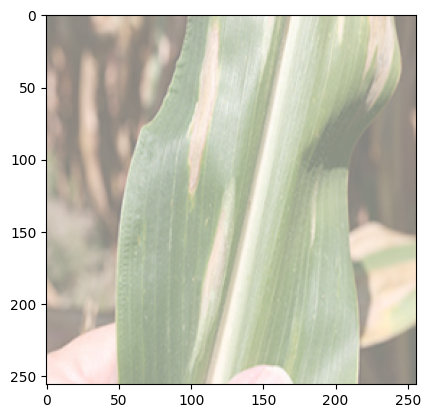

tensor([0])


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

data_iter = iter(testloader)
images, labels = next(data_iter)
images, labels = next(data_iter)
images, labels = next(data_iter)
images, labels = next(data_iter)

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [21]:
# prepare to count predictions for each class
classes = (['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'])
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = v(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    # print(classname,correct_count)

Accuracy for class: Blight is 99.4 %
Accuracy for class: Common_Rust is 98.8 %
Accuracy for class: Gray_Leaf_Spot is 81.7 %
Accuracy for class: Healthy is 99.7 %


In [ ]:
PATH = './SimpleViT2.pth'
torch.save(v.state_dict(), PATH)